# Filmes e Séries: Netflix

## Parte 1: Coleta e Análise Primária dos Dados

In [1]:
# Importando as bibliotecas que serão utilizadas para a realização dos trabalhos:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Definindo algumas configurações iniciais em relação a estilização e dimensões de gráficos 
# para plotagem posterior:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.set(style='darkgrid')

In [4]:
# Criando o DataFrame:
df_movies = pd.read_csv('data/netflix_movies.csv')

In [5]:
# Visualizando os primeiros 5 registros do DataFrame
df_movies.head()

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


In [8]:
# Visualizando um sample aleatório do DataFrame:
df_movies.sample(5)

,title,year,certificate,duration,genre,rating,description,stars,votes
9254,Cannon Busters,(2019– ),TV-MA,NaN,"Animation, Fantasy",6.7,Add a Plot,"['Kenny Blank, ', 'Greg Chun, ', 'Trevor Deval...",41
5383,Video Games: The Movie,(2014),Not Rated,101 min,"Documentary, Animation, History",6.1,"Learn how video games are made, marketed, and ...","['Jeremy Snead', '| ', ' Stars:', 'Sean Ast...","5,510"
7740,20 Jobs You Never Knew Existed,(2021 Video),NaN,14 min,"Documentary, Short",NaN,From people who harvest giant blocks of marble...,"['Abby Tang, ', 'Chiako Yamamoto, ', 'Matt Sla...",NaN
5271,The Miracle of Teddy Bear,(2022– ),NaN,NaN,Romance,8.4,Taohu is a giant white teddy bear and has been...,"['Job Thuchapon, ', 'Sarin Inpitar Ronnakiat']",155
4167,Gamers!,(2017– ),TV-14,24 min,"Animation, Comedy, Romance",6.7,This is a story that revolves around certain s...,"['Megumi Han, ', 'Brandon McInnis, ', 'Hisako ...","1,455"


In [9]:
# Determinando as dimensões do DataFrame:
df_movies.shape

(9957, 9)

Com essa informação, sabemos que nosso DataFrame é composto por **9957 linhas** e **9 colunas**.

In [12]:
# Coletando mais informações acerca do DataFrame utilizando o comando .info():
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   object 
dtypes: float64(1), object(8)
memory usage: 700.2+ KB


Utilizando o comando .info(), podemos estrair algumas informações iniciais importantes sobre os dados:

- Apenas as colunas **`title`**, **`description`** e **`stars`** possuem registros completos sem valores nulos;

- Das 9 colunas, 8 estão no formato *object* (string), sendo que algumas delas como as colunas `year` e `votes` por exemplo poderiam e deveriam estar em valores numéricos.

A seguir, iremos realizar uma checagem mais focada nos dados faltantes do DataFrame:

In [13]:
# Checando porcentagem de dados faltantes no DataFrame:
(((df_movies.isnull().sum() / df_movies.shape[0]) * 100).sort_values(ascending=False)).round(4)

certificate    34.6791
duration       20.4479
rating         11.7807
votes          11.7807
year            5.2928
genre           0.7332
title           0.0000
description     0.0000
stars           0.0000
dtype: float64

Dos registros presentes nas 9 colunas do DataFrame, as colunas:

- **`certificate`** possui 34.68% de valores nulos;

- **`duration`** possui 20.45% de valores nulos;

- **`rating`** e **`votes`** possuem 11.78% de valores nulos;

- **`year`** possui 5.29% de valores nulos;

- **`genre`** possui 0.73% de valores nulos.

### Dicionário de Variáveis

Para termos uma compreensão ainda maior acerca dos nossos dados, realizaremos uma descrição de cada uma das colunas presentes no DataFrame, entrando em detalhes onde for necessário:

- **`title`** - Título da obra (séries, filmes, etc);

- **`year`** - Tupla que contém duas datas: (ano_de_lançamento - ano de encerramento), tendo uma diferença entre obras "únicas" como filmes e obras "contínuas" como Séries:
    
    - *Séries*: (ano_estreia_primeiro_ep - ano_estreia_útlimo_ep) ou apenas (ano_estreia_primeiro_ep - );
    
    - *Filmes*: (ano_lançamento)

- **`certificate`** - Certificado de classificação, em formatos distintos para cada tipo de mídia e baseados em diferentes métricas de avaliação de conteúdo (essa é a coluna mais complexa do DataFrame, onde as definições a seguir foram baseadas em pesquisas realizadas acerca de cada tipo de certificado):

    - *Programas Televisivos: TV Parental Guidelines*

        - **TV-14**: Não recomendado para menores de 14 anos;
        
        - **TV-MA**: Audiência madura - Não recomendado para menores de 17 anos;
        
        - **TV-PG**: Conteúdos recomendados para serem consumidos com orientação parental;

        - **TV-Y7-FV**: Não recomendado para menores de 7 anos, contém violência fantasiosa;

        - **TV-G**: Recomendado para todos os públicos;

        - **TV-Y7**: Não recomendado para menores de 7 anos;

        - **TV-Y**: Conteúdo infantil.

    - *Filmes: Motion Picture Association film rating system*

        - **NC-17**: Ninguém com 17 anos ou menos admitido;

        - **R**: Menores de 17 anos requerem acompanhamento dos pais ou responsáveis adultos;

        - **PG-13**: Alguns materiais podem ser impróprios para crianças menores de 13 anos;

        - **PG**: Parte do material pode não ser adequado para crianças;

        - **G**: Todas as idades admitidas.

    - *Entertainment Software Rating Board*

        - **M (Mature)**: Não recomendado para menores de 17 anos;

        - **E10+**: Recomendado para públicos a partir de 10 anos.

    - *Outros formatos de avaliação presentes*

        - **Not Rated/Unrated**: Sem classificação. Significa que a mídia específica não foi classificada por meio de um processo de classificação. Isso geralmente implica que um trabalho nunca foi autoclassificado ou submetido a um órgão de classificação por diversos motivos como, por exemplo, devido a natureza do trabalho (como um evento esportivo) ou por motivos orçamentários;

        - **Approved/Passed**: Sob o [Código Hays](https://www.megacurioso.com.br/artes-cultura/123329-codigo-hays-as-regras-que-censuravam-filmes-na-era-de-ouro-de-hollywood.htm), os filmes eram simplesmente aprovados ou reprovados com base no fato de serem considerados "morais" ou "imorais". Esse tipo de avaliação é específico para o recorte histórico durante a década de 1930.

        - **12**: Não recomendado para menores de 12 anos;

        - **MA-17**: Não recomendado para menores de 17 anos.

- **`duration`** - Duração do filme ou duração dos episódios de Séries (em minutos);

- **`genre`** - Gênero(s) da obra;

- **`rating`** - Nota de avaliação [IMDb](https://www.imdb.com/);

- **`description`** - Sinópse da obra;

- **`stars`** - Atores de destaque;

- **`votes`** - Quantidade de votos no IMDb.



## Parte 2: Tratamento dos Dados

Para que se possa ter resultados precisos na análise, é necessário a limpeza e tratamento de dados no DataFrame. Para iniciarmos esse processo, vamos checar novamente os data types das colunas:

In [14]:
# Checando os data types:
df_movies.dtypes

title           object
year            object
certificate     object
duration        object
genre           object
rating         float64
description     object
stars           object
votes           object
dtype: object

In [15]:
# Puxando apenas uma linha do DataFrame para visualizarmos melhor os dados:
df_movies.head(1)

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"


Algumas conclusões preliminares podem ser feitas sobre certas colunas:

- **`year`**: O formato dessa coluna é menos que ideal para as análises, sendo assim, algumas mudanças serão realizadas nela. Primeiramente dividi-la em duas colunas diferentes, cada uma contendo o ano de lançamento e o ano de encerramento respectivamente. Já que filmes somente possuem o primeiro valor (lançamento), iremos utilizar 0 como placeholder na segunda coluna (ano de encerramento);

- **`duration`**: Para facilitar as análises, será adaptada para em seu título informar a métrica de tempo usada (minutos) e apenas numeração nos dados em si;

- **`votes`**: Trasformar o data type para tipo float.

In [16]:
# Criação de uma cópia do DataFrame onde será realizada a limpeza e tratativa dos dados:
df_movies_clean = df_movies.copy()

### Tratamento: Coluna year

Para podermos criar duas colunas a partir da coluna year, onde cada uma irá conter o ano de lançamento e ano de encerramento respectivamente, iremos utilizar o método regex para auxiliar nessa operação, onde necessitamos apenas dos valores numéricos que representam os anos:

In [17]:
# Criando uma variável que contém dado Regex para remoção (Remover tudo que não seja número da string):
remove = r'[^0-9]+'

In [21]:
# Utilizando método apply para limpar caracteres indesejáveis da coluna year aplicando a variável regex:
df_movies_clean['year'] = df_movies['year'].apply(
    lambda x: re.sub(remove, '', str(x))
)

# Checando novos dados da coluna year:
df_movies_clean['year'].sample(5)

603         2021
7137            
9150    20192020
3405        2021
6635        2017
Name: year, dtype: object

Com apenas valores numéricos presentes na tabela year, podemos criar as duas novas colunas constando os anos de lançamento e encerramento:

In [22]:
# Criando nova coluna que consta o primeiro ano da tabela year (ano de lançamento):
df_movies_clean['release_year'] = df_movies_clean['year'].apply(
    lambda x: str(x)[:4] if len(str(x)) == 8 else x
)

# Checando novos dados:
df_movies_clean['release_year'].sample(5)

6583    2020
1643    2022
917     2022
2306    2015
2571    2020
Name: release_year, dtype: object

In [29]:
# Criando nova coluna que consta o últímo ano da tabela year (ano de encerramento).
# Caso não exista (como no caso de filmes), colocar 0:
df_movies_clean['ending_year'] = df_movies_clean['year'].apply(
    lambda x: str(x)[-4:] if len(str(x)) == 8 else 0
)

# Checando resultados:
df_movies_clean['ending_year'].sample(5)

8230    2012
3483       0
6165       0
9735    2021
3482       0
Name: ending_year, dtype: object

É necessário agora conferir a integridade dos dados de ambas as novas colunas, checando por valores vazios:

In [59]:
# Checando dados vazios da coluna release_year:
df_movies_clean.loc[(df_movies_clean['release_year'] == ""), 'release_year'].count()

631

In [61]:
# Checando dados vazios da coluna ending_year:
df_movies_clean.loc[(df_movies_clean['ending_year'] == ""), 'ending_year'].count()

0

A coluna `release_year` possui 631 registros faltantes, já a coluna `ending_year` não possui nenhum.

In [62]:
# Tratando dados faltantes da coluna release_year:
df_movies_clean['release_year'] = df_movies_clean['release_year'].apply(
    lambda x: 0 if str(x).isalnum() == False else x
)

Com nossas duas novas colunas de anos, basta transforma-las para o tipo numérico de dados:

In [64]:
# Transformando dados nas colunas de release_year e ending_year para int:
df_movies_clean['release_year'] = df_movies_clean['release_year'].astype(int)
df_movies_clean['ending_year'] = df_movies_clean['ending_year'].astype(int)

### Tratamento: Coluna duration

Como analisado previamente, a coluna `duration` pode ter sua métrica de tempo (minutos) destacada no header e os dados apenas em valores numéricos. Sendo assim, primeiramente se faz necessário remover as letras "min" da coluna:

In [66]:
# Limpando a coluna duration para retirada de letras:
df_movies_clean['duration'] = df_movies_clean['duration'].apply(
    lambda x: 0 if str(x) == 'nan' else str(x)[:-4]
)

# Checando um sample dos resultados:
df_movies_clean['duration'].sample(5)

9617    51
6158    79
4334    98
3010    60
3138    86
Name: duration, dtype: object

In [67]:
# Transformando a coluna duration para int
df_movies_clean['duration'] = df_movies_clean['duration'].astype(int)

In [73]:
# Renomeando coluna duration para informar que a mesma está em minutos:
df_movies_clean.columns = df_movies_clean.columns.str.replace('duration', 'duration_min')

### Tratamento: Coluna votes

A coluna `votes` será tratada da seguinte maneira: Substituindo valores nulos por 0, retirando vírgulas dos dados e os transformando em números inteiros.

In [75]:
# Substituíndo valores nulos para 0:
df_movies_clean['votes'] = df_movies_clean['votes'].apply(
    lambda x: 0 if str(x) == 'nan' else x
)

In [76]:
# Retirando vírgulas:
df_movies_clean['votes'] = df_movies_clean['votes'].apply(
    lambda x: str(x).replace(',','')
)

In [78]:
# Passando valores para int:
df_movies_clean['votes'] = df_movies_clean['votes'].astype(int)

In [79]:
# Visualizando resultados:
df_movies_clean['votes'].sample(5)

693      4287
8007      254
7039        0
5298      503
1116    34106
Name: votes, dtype: int32

### Tratamento: Colunas Stars, Certificate, Rating e Genre

Como essas colunas necessitam apenas de correções básicas, elas estão agrupadas num único capítulo.

- Coluna Stars:

In [80]:
# Substituíndo valores nulos por [not informed]:
df_movies_clean['stars'] = df_movies_clean['stars'].apply(
    lambda x: '[Not Informed]' if str(x) == '[]' else x
)

- Coluna Certificate:

In [81]:
# Substituíndo valores nulos por [not informed]:
df_movies_clean['certificate'] = df_movies_clean['certificate'].apply(
    lambda x: '[Not Informed]' if str(x) == 'nan' else x
)

- Coluna Rating

In [82]:
# Substituindo valores nulos por 0
df_movies_clean['rating'] = df_movies_clean['rating'].apply(
    lambda x: 0 if str(x) == 'nan' else x
)

- Coluna genre

In [83]:
# Substituindo valores nulos por [not informed]
df_movies_clean['genre'] = df_movies_clean['genre'].apply(
    lambda x: '[Not informed]' if str(x) == 'nan' else x
)

Com essas alterações feitas, o DataFrame se encontra em condições apropriadas para análises e retirada de insights. Como última alteração, a sequência das colunas será alterada para melhor visualização:

In [86]:
# Reorganizando o dataframe para uma visualização melhor
df_movies_clean = df_movies_clean.loc[:, 
                            ['title', 'release_year', 'ending_year', 'certificate', 'duration_min', 
                            'genre', 'rating', 'description', 'stars', 'votes']]

# Checando nova visualização                     
df_movies_clean.sample(5)

,title,release_year,ending_year,certificate,duration_min,genre,rating,description,stars,votes
7648,Dennis Nilsen's the History of A Drowning Boy ...,0,0,[Not Informed],0,"Documentary, Biography",0.0,Add a Plot,['Michael Harte'],0
8290,The Tudors,2007,2010,TV-MA,51,"Drama, History, Romance",7.5,"The King asks Charles to escort his sister, Ma...","['Steve Shill', '| ', ' Stars:', 'Jonathan ...",903
4528,"Tayo, the Little Bus",2010,2019,[Not Informed],11,"Animation, Comedy, Family",5.3,In a big city where various vehicles are happi...,"['Patricia Kalis, ', 'Jul Kohler, ', 'Aramis M...",157
7970,Karate World Champion Rates 11 Karate Scenes i...,2021,0,[Not Informed],22,"Documentary, Short",0.0,"Elisa Au, a three-time World Karate Federation...",['Elisa Au'],0
2249,Your Place or Mine,2022,0,[Not Informed],0,"Comedy, Romance",0.0,Two long-distance best friends change each oth...,"['Aline Brosh McKenna', '| ', ' Stars:', 'R...",0


Como checagem extra, vamos conferir se o DataFrame possui registros duplicados:

In [88]:
# Checando se o data frame contém linhas repetidas
df_movies_clean.loc[(df_movies_clean.duplicated() == True), :]

,title,release_year,ending_year,certificate,duration_min,genre,rating,description,stars,votes


## Parte 3: Histogramas, Outliers e Análises Iniciais

Com os dados limpos e organizados, podemos partir para a próxima etapa da análise, que consiste em checar por outliers e compreender melhor a distribuição dos dados ao longo do DataFrame utilizando Histogramas.

Como um primeiro passo, vamos utilizar o comando .describe() nas colunas numéricas para realizar a checagem por outliers e dados relevantes:

In [89]:
# Utilizando describe() para checar os dados:
df_movies_clean[['release_year', 'ending_year', 'duration_min', 'rating', 'votes']].describe()

,release_year,ending_year,duration_min,rating,votes
count,9957.000000,9957.000000,9957.000000,9957.000000,9.957000e+03
mean,1888.050316,314.059657,58.686853,5.967611,1.722323e+04
std,491.205456,731.459807,53.820112,2.461310,8.249809e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2014.000000,0.000000,22.000000,5.500000,1.300000e+02
50%,2018.000000,0.000000,52.000000,6.700000,8.420000e+02
75%,2020.000000,0.000000,93.000000,7.500000,4.260000e+03
max,2025.000000,2023.000000,990.000000,9.900000,1.844075e+06


Com essa tabela, temos algumas informações importantes:

- Coluna **`release_year`**:

    - O ano máximo presente nos dados é 2025, sendo que estamos em 2022 no tempo de confecção deste trabalho, logo, isso indica que possivelmente algumas das datas de lançamento são previsões de obras ainda não lançadas, porém que já constam no catálogo da Netflix como projetos com datas previstas de estreia. Esse fato será levado em conta nas análises posteriores.

- Coluna **`ending_year`**:

    - Similarmente a coluna release_year, o ano máximo de encerramento de uma obra é maior do que o ano de confecção do projeto, sendo 2023 essa data máxima. Isso provavelmente signifca que temos obras como Séries que ou já possuem data limite de exibição ou estão se aproximando do seu final, onde já possuem data de encerramento.

- Coluna **`duration`**:

    - 75% dos dados constam duração máxima de 93 minutos, porém o valor máximo presente é de 990. Isso indica claramente um outlier. Uma possibilidade de explicação, é a de que algumas séries podem ter sido lançadas no banco de dados em um único registro, onde a minutagem total representa a soma de todos os seus episódios, onde outras séries foram inseridas episódio por episódio no banco de dados.

- Coluna **`votes`**:

    - Como a quantidade de votos é muito grande, as análises por meios de gráficos provavelmente terão que ser realizadas utilizando escala logarítimica para melhor visualização.

Para podermos explorar melhor essas características dos dados, vamos plotar histogramas e boxplots para cada coluna numérica:

### Coluna release_year

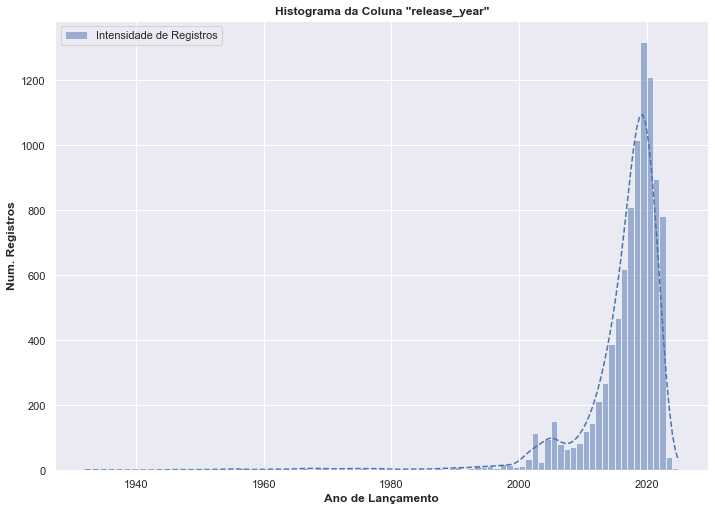

In [93]:
# Histograma

# Selecionando dados existentes, ou seja, aqueles diferentes de 0 para compor a análise:
release_year = df_movies_clean.loc[(df_movies_clean['release_year'] != 0), ['release_year']]

# Plotando:
sns.histplot(
    data=release_year, 
    x='release_year', 
    kde=True, 
    label='Intensidade de Registros', 
    binwidth=1, 
    line_kws={'linestyle':'dashed'}
    )

plt.title('Histograma da Coluna "release_year"', fontsize=12, fontweight='bold')
plt.ylabel('Num. Registros', fontsize=12, fontweight='bold')
plt.xlabel('Ano de Lançamento', fontsize=12, fontweight='bold')

plt.legend()
plt.show()

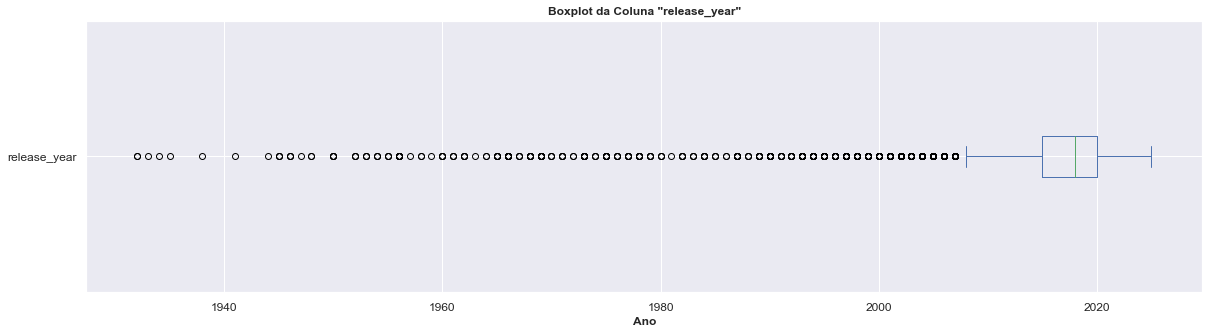

Anos acima de 2022:
47 entradas
0.5040%


In [95]:
# Boxplot

# Selecionando dados diferentes de 0 para checagem distributiva dos dados:
release_year = df_movies_clean.loc[(df_movies_clean['release_year'] != 0), ['release_year']]

# Plotando:
release_year.plot(
    kind='box', 
    vert=False, 
    figsize=(20,5), 
    fontsize=12
    )

plt.title('Boxplot da Coluna "release_year"', fontsize=12, fontweight='bold')
plt.xlabel('Ano', fontsize=12, fontweight='bold')

plt.show()

# Printando a quantidade anos que estão acima de 2022 (ano da confecção desse projeto):
print("Anos acima de 2022:")
print("{} entradas".format(len(release_year[release_year['release_year'] > 2022])))
print("{:.4f}%".format((len(release_year[release_year['release_year'] > 2022]) / release_year.shape[0]) * 100))

Alguns insights podem ser adiquiridos a partir dessas análises:

- Como apontam tanto o Histograma quanto o Boxplot, a maioria dos projetos possuem ano de lançamento por volta de 2020;

- De acordo com o Boxplot, 47 registros possuem anos de lançamento agendados para anos acima de 2022;

- Por mais que os quartis estejam agrupados por volta de 2020, ainda temos registros de filmes bem mais antigos do que isso, como alguns que constam como lançamento datas anteriores a 1940.

Como forma de visualização, vamos checar alguns desses registros que possuem data de lançamento maiores de 2022:

In [96]:
# checando entradas acima de 2022:
df_movies_clean.query('release_year > 2022').sample(5)

,title,release_year,ending_year,certificate,duration_min,genre,rating,description,stars,votes
6246,Not Quite Narwhal,2023,0,TV-Y,0,"Animation, Adventure, Comedy",0.0,Not Quite Narwhal follows curious and fun-lovi...,"['Nevin Kar, ', 'Sasha Knight']",0
2523,The Brothers Sun,2023,0,[Not Informed],0,"Action, Comedy, Drama",0.0,"Follows Charles Sun, a Taipei gangster who's s...","['Michelle Yeoh, ', 'Highdee Kuan, ', 'Sam Son...",0
4860,Rabo de Peixe,2023,0,[Not Informed],0,Thriller,0.0,Four friends whose lives changed forever with ...,"['José Condessa, ', 'Helena Caldeira, ', 'Rodr...",0
3559,Transatlantic,2023,0,[Not Informed],0,"Drama, History",0.0,"An American journalist who, during 13 months s...","['Gillian Jacobs, ', 'Corey Stoll, ', 'Cory Mi...",0
3174,Thelma the Unicorn,2025,0,[Not Informed],0,"Animation, Adventure, Comedy",0.0,When a rare pink and glitter-filled moment of ...,['Jared Hess'],0


- Como são projetos que estão agendados para estrear, eles não possuem nenhum tipo de avaliação, duração nem votos, para essa análise eles serão retirados mais adiante, pois o objetivo é analisar os programas já lançados e seus respectivos dados.

### Coluna ending_year

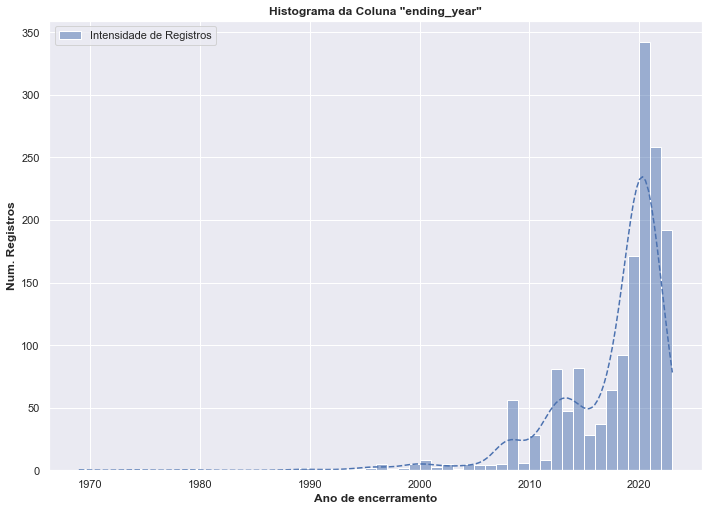

In [97]:
# Histograma

# Selecionando dados diferentes de 0:
ending_year = df_movies_clean.loc[(df_movies_clean['ending_year'] != 0), ['ending_year']]

# Plotando
sns.histplot(
    data=ending_year, 
    kde=True, 
    label='Intensidade de Registros', 
    binwidth=1, 
    line_kws={'linestyle': 'dashed'}
    )

plt.title('Histograma da Coluna "ending_year"', fontsize=12, fontweight='bold')
plt.ylabel('Num. Registros', fontsize=12, fontweight='bold')
plt.xlabel('Ano de encerramento', fontsize=12, fontweight='bold')

plt.legend()
plt.show()

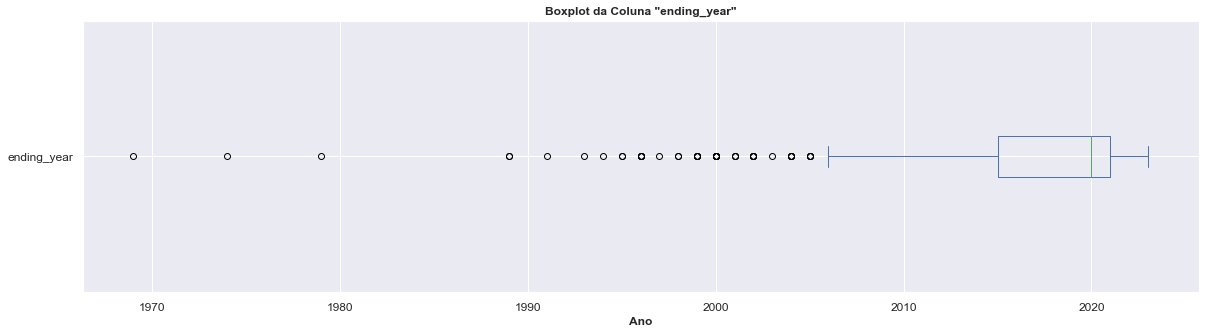

Anos acima de 2022:
53 entradas
3.4194%


In [103]:
# Boxplot

# Selecionando dados diferente de 0:
ending_year = df_movies_clean.loc[(df_movies_clean['ending_year'] != 0), ['ending_year']]

# Plotando
ending_year.plot(
    kind='box', 
    vert=False, 
    figsize=(20,5), 
    fontsize=12
    )

plt.title('Boxplot da Coluna "ending_year"', fontsize=12, fontweight='bold')
plt.xlabel('Ano', fontsize=12, fontweight='bold')

plt.show()

# Printando a quantidade de registros acima de 2022:
print("Anos acima de 2022:")
print("{} entradas".format(len(ending_year[ending_year['ending_year'] > 2022])))
print("{:.4f}%".format((len(ending_year[ending_year['ending_year'] > 2022]) / ending_year.shape[0]) * 100))

Como apontam o Histograam e o Boxplot, curiosamente o ano de encerramento mais comum é o mesmo ano de lançamento mais comum, 2020. Isso pode indicar algumas coisas:

- Lançamentos de mini-séries que se iniciam e terminam no mesmo ano;

- É válido considerar a [pandemia de Covid-19 e seus impactos na indústria do cinema](https://www.vet.k-state.edu/about/news-events-publications/OneHealth/Vol14-Iss1/film-industry.html#:~:text=As%20a%20result%20of%20the,produced%20in%202021%20or%202022.), onde muitas produções de filmes e séries foram canceladas, encerradas abruptamente ou postergadas para anos seguintes durante 2020, o que pode compor uma explicação para tantos encerramentos em 2020. 

Vamos checar alguns desses registros que constam data de encerramento maiores que 2022:

In [109]:
# checando  entradas acima de 2022:
df_movies_clean.query('ending_year > 2022').sample(5)

,title,release_year,ending_year,certificate,duration_min,genre,rating,description,stars,votes
8300,The Umbrella Academy,2019,2023,TV-14,47,"Action, Adventure, Comedy",8.2,After dropping his siblings into an alley in D...,"['Sylvain White', '| ', ' Stars:', 'Elliot ...",4357
9596,The Umbrella Academy,2019,2023,TV-14,40,"Action, Adventure, Comedy",8.7,"As the Fives plot against each other, one of t...","['Amanda Marsalis', '| ', ' Stars:', 'Ellio...",3929
8368,Never Have I Ever,2020,2023,TV-14,24,"Comedy, Drama",8.4,Flashbacks unearth painful memories and resent...,"['Tristram Shapeero', '| ', ' Stars:', 'Mai...",974
49,Never Have I Ever,2020,2023,TV-14,30,"Comedy, Drama",7.9,The complicated life of a modern-day first gen...,"['Maitreyi Ramakrishnan, ', 'Poorna Jagannatha...",56216
8366,Never Have I Ever,2020,2023,TV-14,24,"Comedy, Drama",7.6,Devi oversteps several boundaries in an attemp...,"['Anu Valia', '| ', ' Stars:', 'Maitreyi Ra...",898


- São programas já estabelecidos que possuem um ano previsto para finalização (a série Never Have I Ever como exemplificado acima com 3 episódios aparecendo na sample), nesse caso iremos deixá-los na análise justamente por possuirem dados relevantes (minutagem, rating e votos).

### Coluna duration_min

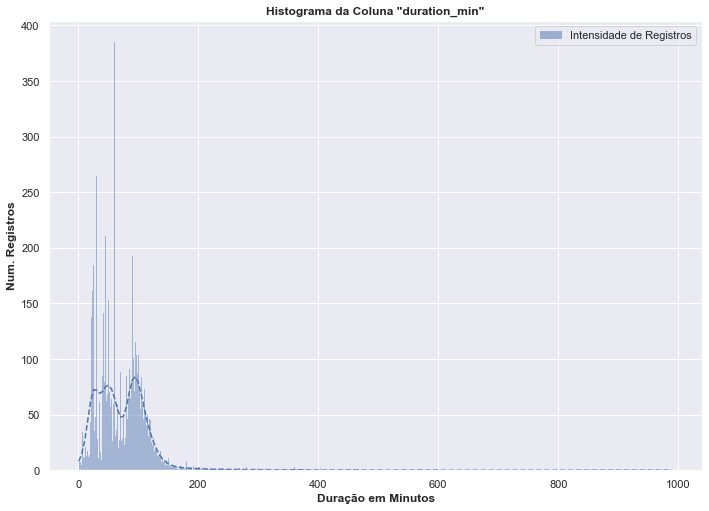

In [100]:
# Histograma

# Selecionando dados diferentes de 0:
duration_min = df_movies_clean.loc[(df_movies_clean['duration_min'] != 0), ['duration_min']]

# Plotando:
sns.histplot(
    data=duration_min, 
    kde=True, 
    label='Intensidade de Registros', 
    binwidth=1, 
    line_kws={'linestyle': 'dashed'}
    )

plt.title('Histograma da Coluna "duration_min"', fontsize=12, fontweight='bold')
plt.ylabel('Num. Registros', fontsize=12, fontweight='bold')
plt.xlabel('Duração em Minutos', fontsize=12, fontweight='bold')

plt.legend()
plt.show()

Somente com o histograma é aparente a distribuição não adequada da coluna de minutagem, onde a grande maioria dos dados estão abaixo de por volta 150 a 200 minutos porém o eixo X vai até 1000.

Com o boxplot, iremos visualizar quantos desses registros estão acima de 175 minutos, com um bom middle-point entre 150 e 200 para termos uma dimensão melhor dos outliers.

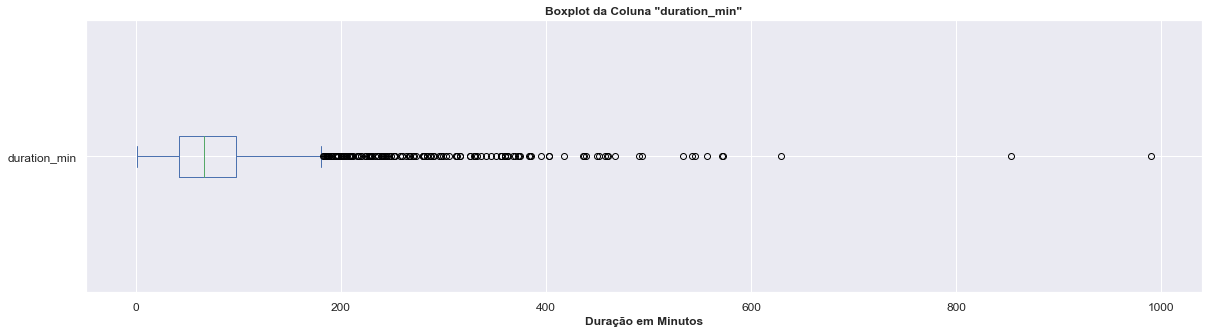

Minutagens acima de 175:
172 entradas
2.1714%


In [105]:
# Boxplot

# Selecionando dados diferentes de 0:
duration_min = df_movies_clean.loc[(df_movies_clean['duration_min'] != 0), ['duration_min']]


# Plotando:
duration_min.plot(
    kind='box', 
    vert=False, 
    figsize=(20,5), 
    fontsize=12
    )

plt.title('Boxplot da Coluna "duration_min"', fontsize=12, fontweight='bold')
plt.xlabel('Duração em Minutos', fontsize=12, fontweight='bold')

plt.show()

# Mostrando registros acima de 175 minutos:
print("Minutagens acima de 175:")
print("{} entradas".format(len(duration_min[duration_min['duration_min'] > 175])))
print("{:.4f}%".format((len(duration_min[duration_min['duration_min'] > 175]) / duration_min.shape[0]) * 100))

É aparente que temos outliers nessa coluna, porém, para termos uma compreensão melhor do que são esses registros com minutagens tão extensas, vamos puxar um sample do DataFrame para visualização:

In [114]:
# Checando entradas acima de 175 minutos:
df_movies_clean.query('duration_min > 175').sample(5)

,title,release_year,ending_year,certificate,duration_min,genre,rating,description,stars,votes
1396,Giri/Haji,2019,0,TV-MA,461,"Crime, Drama, Mystery",7.8,A detective from Tokyo scours London for his m...,"['Takehiro Hira, ', 'Kelly Macdonald, ', 'Yôsu...",14301
367,The Stranger,2020,0,TV-MA,363,"Crime, Drama, Mystery",7.3,Follows the lives of suburban families whose s...,"['Richard Armitage, ', 'Shaun Dooley, ', 'Siob...",50086
2007,Conversations with a Killer: The Ted Bundy Tapes,2019,0,TV-MA,236,"Documentary, Biography, Crime",7.7,A look inside the mind of serial killer Ted Bu...,"['Stephen Michaud, ', 'Bob Keppel, ', 'Kathlee...",29416
250,Dracula,2020,0,TV-14,270,"Action, Drama, Fantasy",6.8,"In 1897 Transylvania, the blood-drinking Count...","['Claes Bang, ', 'Dolly Wells, ', 'Morfydd Cla...",47794
468,Gilmore Girls: A Year in the Life,2016,0,TV-14,370,"Comedy, Drama",7.6,Set nearly a decade after the finale of the or...,"['Lauren Graham, ', 'Alexis Bledel, ', 'Scott ...",38451


- Os registros são séries (como Giri/Haji) cujas inserções no banco de dados aparentemente se deu de uma vez só em um único registro, causando com que a minutagem fosse o acumulado de todas as minutagens dos episódios das séries;

- Além de séries temos também documentários presentes como The Ted Bundy Tapes e provavelmente alguns longas metragem como Lord Of The Ring também devem estar presentes nos regsitros.

In [124]:
# Checando para ver um longa como Lord Of The Rings compõe parte desses dados com minutagem
# acima de 175 minutos:
df_movies_clean.loc[df_movies_clean['title'].str.contains("Rings")]

,title,release_year,ending_year,certificate,duration_min,genre,rating,description,stars,votes
20,The Lord of the Rings: The Fellowship of the Ring,2001,0,PG-13,178,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1844055
57,The Lord of the Rings: The Return of the King,2003,0,PG-13,201,"Action, Adventure, Drama",9.0,Gandalf and Aragorn lead the World of Men agai...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1819157
78,The Lord of the Rings: The Two Towers,2002,0,PG-13,179,"Action, Adventure, Drama",8.8,While Frodo and Sam edge closer to Mordor with...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1642708
9921,The Lord of the Rings: The Fellowship of the Ring,2001,0,PG-13,178,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1844075


Com a informação de que esses outliers de minutagem também são dados válidos para a análise porém são longos demais que iriam distorcer as análises, como solução iremos dividir o DataFrame em dois, onde teremos:

- DataFrame contendo dados de obras com minutagem menor do que 175 minutos;

- DataFrame contendo dados de obras com minutagem maior do que 175 minutos (longas, séries, documentários).

Dessa forma, se é capaz de ter análises pertinentes a respeito desses registros de minutagens longas e também dos de minutagem mais curta.

### Coluna rating

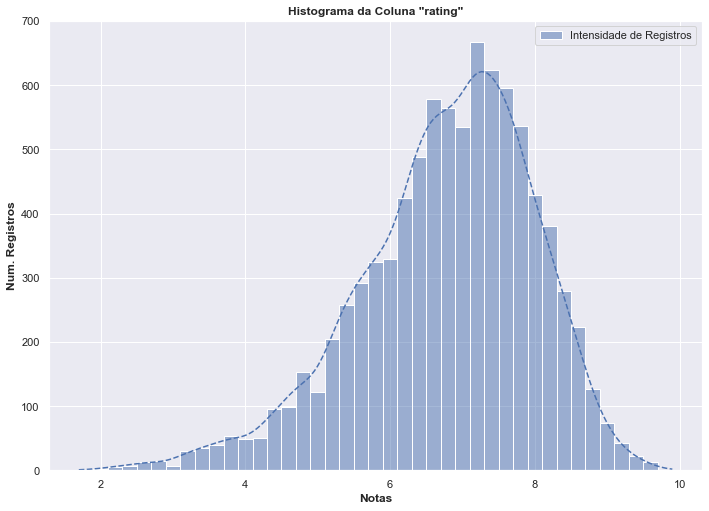

In [125]:
# Histograma

# Selecionando dados diferentes de 0:
rating = df_movies_clean.loc[(df_movies_clean['rating'] != 0), ['rating']]

# Plotando:
sns.histplot(
    data=rating, 
    kde=True, 
    label='Intensidade de Registros', 
    binwidth=0.2, 
    line_kws={'linestyle': 'dashed'}
    )

plt.title('Histograma da Coluna "rating"', fontsize=12, fontweight='bold')
plt.ylabel('Num. Registros', fontsize=12, fontweight='bold')
plt.xlabel('Notas', fontsize=12, fontweight='bold')

plt.legend()
plt.show()

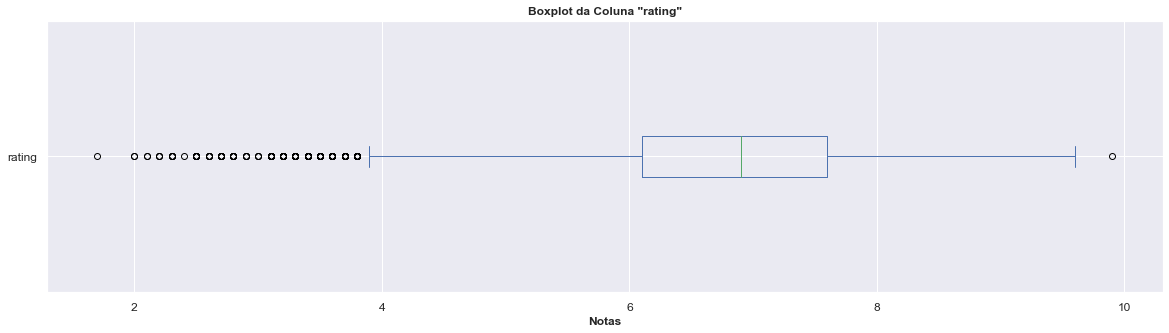

In [126]:
# Boxplot

# Selecionando dados diferentes de 0:
ratings = df_movies_clean.loc[(df_movies_clean['rating'] != 0), ['rating']]

# Plotando:
ratings.plot(
    kind='box', 
    vert=False, 
    figsize=(20,5), 
    fontsize=12
    )

plt.title('Boxplot da Coluna "rating"', fontsize=12, fontweight='bold')
plt.xlabel('Notas', fontsize=12, fontweight='bold')

plt.show()

Aqui podemos ter uma visualização melhor dos dados da coluna rating, onde a maioria das obras receberam uma avaliação de por volta 7, tendo alguns registos abaixo de 4 e um abaixo de 2.

Com o Histograma, podemos ver que os dados estão distribuidos de forma homogênia com uma tendência a direita.

### Coluna votes

Como dito nas primeiras checagens da coluna votes, pela quantidade massiva de votos dados para cada projeto, a visualização do Histograma dessa coluna será feita em escala logarítimica para melhor visualização.

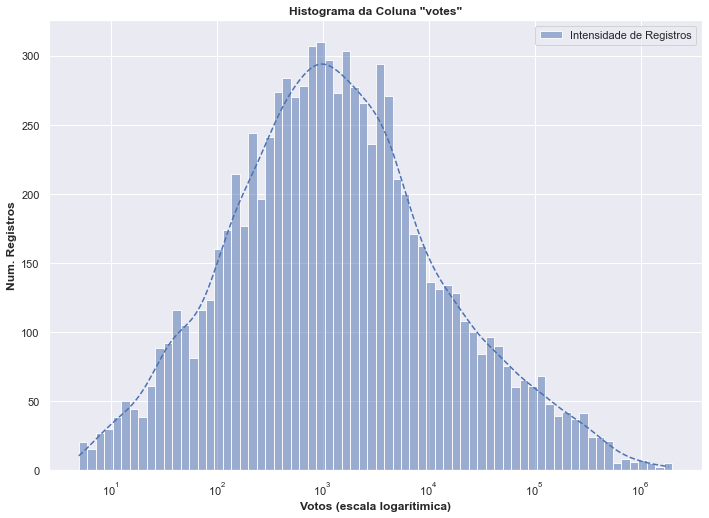

In [127]:
# Histograma

# Selecionando dados diferentes de 0:
votes = df_movies_clean.loc[(df_movies_clean['votes'] != 0), ['votes']]

# Plotando:
sns.histplot(
    data=votes, 
    kde=True, 
    label='Intensidade de Registros', 
    binwidth=0.08, 
    line_kws={'linestyle': 'dashed'}, 
    log_scale=True
    )

plt.title('Histograma da Coluna "votes"', fontsize=12, fontweight='bold')
plt.ylabel('Num. Registros', fontsize=12, fontweight='bold')
plt.xlabel('Votos (escala logarítimica)', fontsize=12, fontweight='bold')

plt.legend()
plt.show()

Aqui temos o inverso do visualizado no histograma da coluna rating, uma distribuição homogênia dos dados que tende a esquerda.

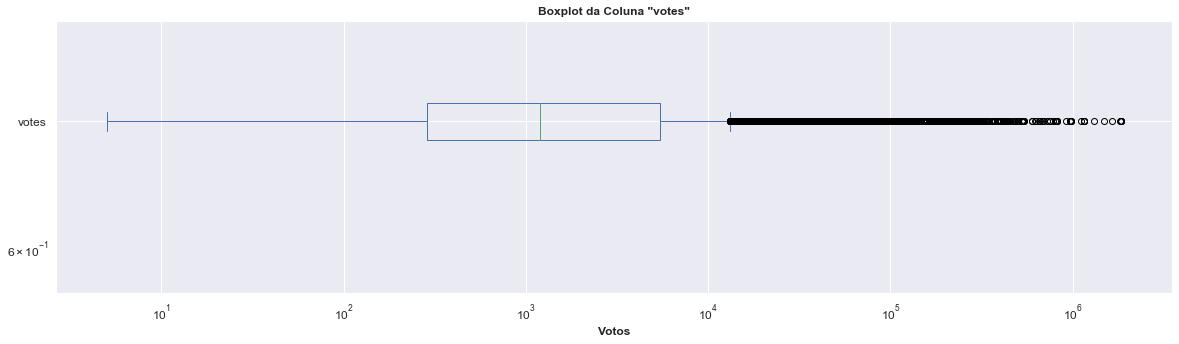

In [130]:
# Boxplot

# Selecionando dados diferentes de 0:
votes = df_movies_clean.loc[(df_movies_clean['votes'] != 0), ['votes']]

# Plotando:
votes.plot(
    kind='box', 
    vert=False, 
    figsize=(20,5), 
    fontsize=12,
    loglog=True
    )

plt.title('Boxplot da Coluna "votes"', fontsize=12, fontweight='bold')
plt.xlabel('Votos', fontsize=12, fontweight='bold')

plt.show()

A tendência a esquerda dos dados pode ser bem visualizada com o boxplot, onde alguns outliers estão mais a direita.

Com o conhecimento dos outliers e características dos dados como um todo, a próxima etapa consistirá em dividir o DataFrame em dois (de minutagem curta e longa) e realizar as análises para gerar insights mais aprofundados.